In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## This is my custom library, where I have stored all the custom functions
from ml_library import *

from pandas_summary import DataFrameSummary
import re

from IPython.display import HTML, display

In [2]:
pd.__version__

'0.24.2'

In [3]:
file_names = ['https://raw.githubusercontent.com/unkn0wnxx/kaggle-rossmann-store-sales/master/data/train.csv', 
              'https://raw.githubusercontent.com/unkn0wnxx/kaggle-rossmann-store-sales/master/data/store.csv', 
              'https://raw.githubusercontent.com/unkn0wnxx/kaggle-rossmann-store-sales/master/data/test.csv',
              'https://raw.githubusercontent.com/unkn0wnxx/kaggle-rossmann-store-sales/master/data/state.csv']

In [4]:
tables_df = [pd.read_csv(f'{file_name}') for file_name in file_names]

C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [5]:
train_df, store_df, test_df, state_df = tables_df

In [6]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
train_df.shape

(1017209, 9)

In [8]:
DataFrameSummary(train_df).summary()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.01721e+06,1.01721e+06,NaN,1.01721e+06,1.01721e+06,1.01721e+06,1.01721e+06,NaN,1.01721e+06
mean,558.43,3.99834,NaN,5773.82,633.146,0.830107,0.381515,NaN,0.178647
std,321.909,1.99739,NaN,3849.93,464.412,0.375539,0.485759,NaN,0.383056
min,1,1,NaN,0,0,0,0,NaN,0
25%,280,2,NaN,3727,405,1,0,NaN,0
50%,558,4,NaN,5744,609,1,0,NaN,0
75%,838,6,NaN,7856,837,1,1,NaN,0
max,1115,7,NaN,41551,7388,1,1,NaN,1
counts,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209
uniques,1115,7,942,21734,4086,2,2,5,2


In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [10]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,41088.0,20544.500000,11861.228267,1.0,10272.75,20544.5,30816.25,41088.0
Store,41088.0,555.899533,320.274496,1.0,279.75,553.5,832.25,1115.0
DayOfWeek,41088.0,3.979167,2.015481,1.0,2.00,4.0,6.00,7.0
Open,41077.0,0.854322,0.352787,0.0,1.00,1.0,1.00,1.0
Promo,41088.0,0.395833,0.489035,0.0,0.00,0.0,1.00,1.0
SchoolHoliday,41088.0,0.443487,0.496802,0.0,0.00,0.0,1.00,1.0


In [11]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
store_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


In [13]:
state_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.0,322.01708,1.0,279.5,558.0,836.5,1115.0


### Missing Values

In [14]:
def missing_values(df):
    #check null values 
    df_na = (df.isnull().sum() / len(df)) * 100
    df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :df_na})
    
    if (df_na.shape[0] != 0):
        f, ax = plt.subplots(figsize=(8, 6))
        plt.xticks(rotation='90')
        sns.barplot(x=df_na.index, y=df_na)
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Percent of missing values', fontsize=15)
        plt.title('Percent missing data by feature', fontsize=15)
        
    return missing_data.head(22)

In [15]:
missing_values(train_df)

,Missing Ratio


,Missing Ratio
Open,0.026772


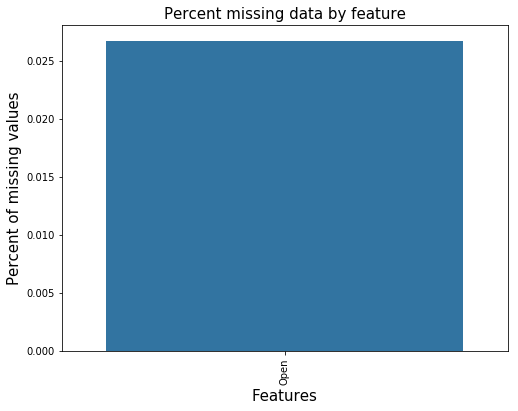

In [16]:
missing_values(test_df)

,Missing Ratio
PromoInterval,48.789238
Promo2SinceYear,48.789238
Promo2SinceWeek,48.789238
CompetitionOpenSinceYear,31.748879
CompetitionOpenSinceMonth,31.748879
CompetitionDistance,0.269058


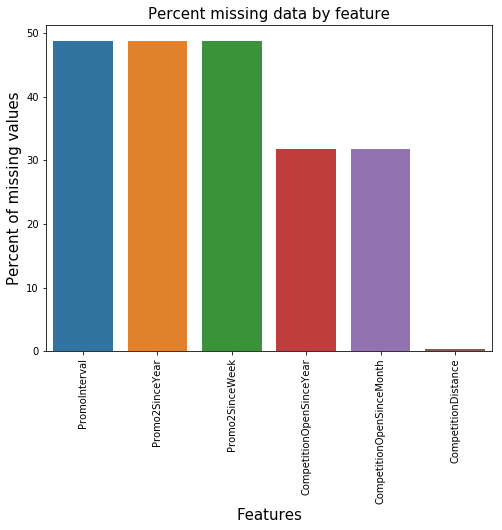

In [17]:
missing_values(store_df)

Theoretically, 25 to 30% is the maximum missing values are allowed, beyond which we might want to drop the variable from analysis. Practically this varies.At times we get variables with ~50% of missing values but still the customer insist to have it for analyzing. In those cases we might want to treat them accordingly.

In [18]:
def density_plots(df):
    num_cols = list(df._get_numeric_data().columns)
    for i in range(0,len(num_cols),2):
        if len(num_cols) > i+1:
            plt.figure(figsize=(8,2))
            plt.subplot(121)
            sns.distplot(df[num_cols[i]], hist=True, kde=True)
            plt.subplot(122)            
            sns.distplot(df[num_cols[i+1]], hist=True, kde=True)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(df[num_cols[i]], hist=True, kde=True)

## First we will deal with Store dataset

1. Remove Missing Values
2. Missing values Imputation
3. Feature Encoding

In [19]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


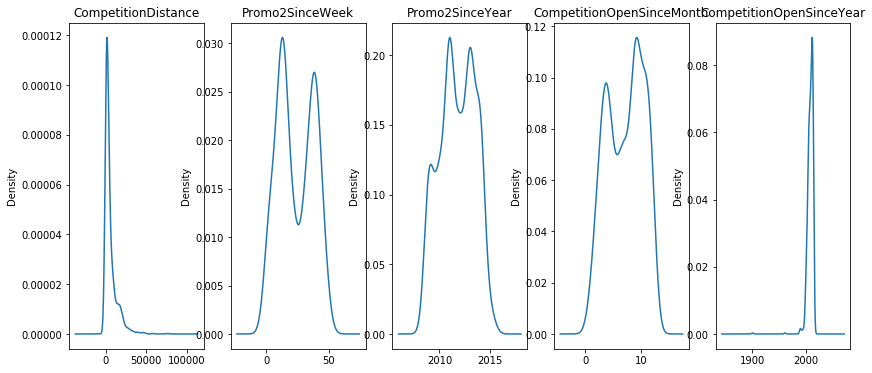

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(151)
store_df.CompetitionDistance.plot.kde(title='CompetitionDistance')
plt.subplot(152)
store_df.Promo2SinceWeek.plot.kde(title='Promo2SinceWeek')
plt.subplot(153)
store_df.Promo2SinceYear.plot.kde(title='Promo2SinceYear')
plt.subplot(154)
store_df.CompetitionOpenSinceMonth.plot.kde(title='CompetitionOpenSinceMonth')
plt.subplot(155)
store_df.CompetitionOpenSinceYear.plot.kde(title='CompetitionOpenSinceYear')


In [21]:
store_df['Promo2SinceYear'].value_counts()

2011.0    128
2013.0    120
2014.0     95
2012.0     81
2009.0     73
2010.0     64
2015.0     10
Name: Promo2SinceYear, dtype: int64

In [22]:
store_df['Promo2SinceYear'].median()

2012.0

In [23]:
store_df['Promo2SinceWeek'].value_counts()

14.0    81
40.0    77
31.0    44
10.0    42
5.0     39
37.0    35
1.0     35
45.0    34
13.0    34
22.0    33
18.0    29
35.0    25
9.0     14
27.0    11
36.0    10
48.0     9
39.0     6
23.0     5
44.0     3
49.0     1
6.0      1
26.0     1
50.0     1
28.0     1
Name: Promo2SinceWeek, dtype: int64

In [24]:
store_df['Promo2SinceWeek'].median()

22.0

In [25]:
print(store_df['CompetitionOpenSinceYear'].median())
print(store_df['CompetitionOpenSinceMonth'].median())
print(store_df['CompetitionDistance'].median())

2010.0
8.0
2325.0


## Remove Features with a lot of missing values

In [26]:
store_df.drop(['PromoInterval'], axis=1, inplace=True)

## Imputation for features with less missing values

In [27]:
#### Replace value with median instead of mean because of outlier/skewed dataset
store_df.Promo2SinceYear.fillna(store_df.Promo2SinceYear.median(), inplace=True)
store_df.Promo2SinceWeek.fillna(store_df.Promo2SinceWeek.median(), inplace=True)
store_df.CompetitionOpenSinceYear.fillna(store_df.CompetitionOpenSinceYear.median(), inplace=True)
store_df.CompetitionOpenSinceMonth.fillna(store_df.CompetitionOpenSinceMonth.median(), inplace=True)
store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


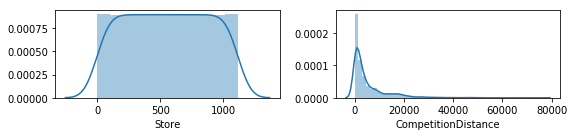

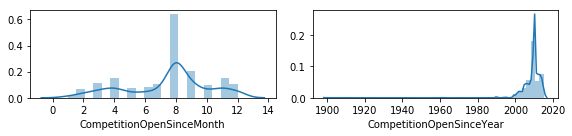

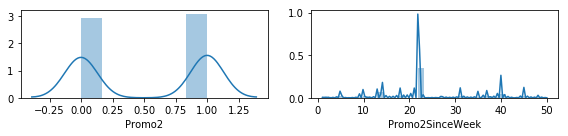

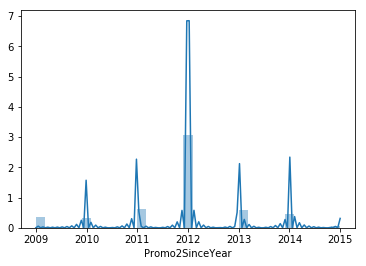

In [28]:
density_plots(store_df)

In [29]:
store_df['StoreType'].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [30]:
store_df['Assortment'].value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

In [31]:
def numerical_features(df):
    #let's find out the number of numerical Features in our dataset.
    numerical_feature_columns = list(df._get_numeric_data().columns)
    return numerical_feature_columns

def categorical_features(df):
    #let's find out the number of Categorical Features in our dataset.
    categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
    return categorical_feature_columns

def categorical_labels(df,categorical_feature_columns):
    for var in categorical_feature_columns:
        print(var, 'contains :', len(df[var].unique()), ' labels')

In [32]:
num_f = numerical_features(store_df)
cat_f = categorical_features(store_df)

categorical_labels(store_df,cat_f)

StoreType contains : 4  labels
Assortment contains : 3  labels


In [33]:
df_store = pd.get_dummies(store_df, columns = cat_f)
print(df_store.shape)

(1115, 14)


## Next we will deal with Store sales (train) dataset


In [34]:
train_df.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [35]:
train_df.StateHoliday = train_df.StateHoliday!='0'

In [36]:
train_df.StateHoliday.unique()

array([False,  True])

In [37]:
## Derive Additinal features using date

def add_date_features(df, field_name):
    field = df[field_name]
    field_dtype = field.dtype
    if isinstance(field_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        field_dtype = np.datetime64

    if not np.issubdtype(field_dtype, np.datetime64):
        df[field_name] = field = pd.to_datetime(field, infer_datetime_format=True)
    target_prefix = re.sub('[Dd]ate$', '', field_name)
    attributes = ['Year', 'Month', 'Week', 'Day', 'DayOfWeek', 'DayOfYear',
            'Is_Month_End', 'Is_Month_Start', 'Is_Quarter_End', 'Is_Quarter_Start', 'Is_Year_End', 'Is_Year_Start']
    for attr in attributes: df[target_prefix + attr] = getattr(field.dt, attr.lower())

In [38]:
add_date_features(train_df, "Date")
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,DayOfYear,Is_Month_End,Is_Month_Start,Is_Quarter_End,Is_Quarter_Start,Is_Year_End,Is_Year_Start
0,1,4,2015-07-31,5263,555,1,1,False,1,2015,7,31,31,212,True,False,False,False,False,False
1,2,4,2015-07-31,6064,625,1,1,False,1,2015,7,31,31,212,True,False,False,False,False,False
2,3,4,2015-07-31,8314,821,1,1,False,1,2015,7,31,31,212,True,False,False,False,False,False
3,4,4,2015-07-31,13995,1498,1,1,False,1,2015,7,31,31,212,True,False,False,False,False,False
4,5,4,2015-07-31,4822,559,1,1,False,1,2015,7,31,31,212,True,False,False,False,False,False


## Join Train DataFrame With Store DataFrame

In [39]:
train_df = pd.merge(train_df, df_store, how='left', on='Store')
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,4,2015-07-31,5263,555,1,1,False,1,2015,...,0,22.0,2012.0,0,0,1,0,1,0,0
1,2,4,2015-07-31,6064,625,1,1,False,1,2015,...,1,13.0,2010.0,1,0,0,0,1,0,0
2,3,4,2015-07-31,8314,821,1,1,False,1,2015,...,1,14.0,2011.0,1,0,0,0,1,0,0
3,4,4,2015-07-31,13995,1498,1,1,False,1,2015,...,0,22.0,2012.0,0,0,1,0,0,0,1
4,5,4,2015-07-31,4822,559,1,1,False,1,2015,...,0,22.0,2012.0,1,0,0,0,1,0,0


## Omit rows from the dataset when the store was not open

In [40]:
train_df = train_df[train_df.Open != 0]
train_df.drop('Open', axis=1, inplace=True)

## Omit rows when 0 sales happened

In [41]:
train_df = train_df[train_df.Sales!=0]
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,4,2015-07-31,5263,555,1,False,1,2015,7,...,0,22.0,2012.0,0,0,1,0,1,0,0
1,2,4,2015-07-31,6064,625,1,False,1,2015,7,...,1,13.0,2010.0,1,0,0,0,1,0,0
2,3,4,2015-07-31,8314,821,1,False,1,2015,7,...,1,14.0,2011.0,1,0,0,0,1,0,0
3,4,4,2015-07-31,13995,1498,1,False,1,2015,7,...,0,22.0,2012.0,0,0,1,0,0,0,1
4,5,4,2015-07-31,4822,559,1,False,1,2015,7,...,0,22.0,2012.0,1,0,0,0,1,0,0


In [42]:
train_df.reset_index(inplace=True)
train_df.head(3)

,index,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,...,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0,1,4,2015-07-31,5263,555,1,False,1,2015,...,0,22.0,2012.0,0,0,1,0,1,0,0
1,1,2,4,2015-07-31,6064,625,1,False,1,2015,...,1,13.0,2010.0,1,0,0,0,1,0,0
2,2,3,4,2015-07-31,8314,821,1,False,1,2015,...,1,14.0,2011.0,1,0,0,0,1,0,0


In [43]:
train_df.shape

(844338, 33)

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844338 entries, 0 to 844337
Data columns (total 33 columns):
index                        844338 non-null int64
Store                        844338 non-null int64
DayOfWeek                    844338 non-null int64
Date                         844338 non-null datetime64[ns]
Sales                        844338 non-null int64
Customers                    844338 non-null int64
Promo                        844338 non-null int64
StateHoliday                 844338 non-null bool
SchoolHoliday                844338 non-null int64
Year                         844338 non-null int64
Month                        844338 non-null int64
Week                         844338 non-null int64
Day                          844338 non-null int64
DayOfYear                    844338 non-null int64
Is_Month_End                 844338 non-null bool
Is_Month_Start               844338 non-null bool
Is_Quarter_End               844338 non-null bool
Is_Quarter_Start 

In [45]:
new_train_df = train_df.set_index("Date")

In [46]:
numerical_features(new_train_df)

['index',
 'Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Year',
 'Month',
 'Week',
 'Day',
 'DayOfYear',
 'Is_Month_End',
 'Is_Month_Start',
 'Is_Quarter_End',
 'Is_Quarter_Start',
 'Is_Year_End',
 'Is_Year_Start',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [48]:
X = new_train_df.drop(columns=['Sales'])
y = new_train_df["Sales"]
df_final = pd.concat([X,y],axis=1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
      cross_validation         rmse           mse         mae        r2  \
name          0.829448  1281.251751  1.641606e+06  931.259299  0.829227   

      adj_r_squared  
name       0.829207  


,0,Coefficient Estimate
0,index,0.002393
1,Store,-0.108400
2,DayOfWeek,-44.147949
3,Customers,7.333705
4,Promo,1128.003792
5,StateHoliday,-154.872180
6,SchoolHoliday,37.169912
7,Year,1114.548807
8,Month,308.172928
9,Week,-9.991261


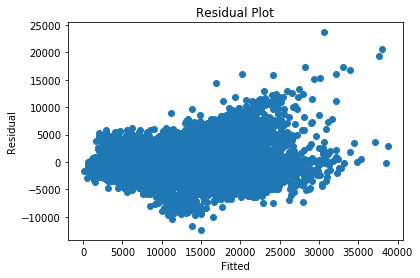

In [49]:
X_train, X_test, y_train, y_test =  split_dataset(df_final)

model,y_pred,stats = linear_regression(X_train,y_train,X_test, y_test)
print(model)
print(stats)
plot_residuals(y_test,y_pred)

## calculating coefficients

coeff = pd.DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = pd.Series(model.coef_)
coeff

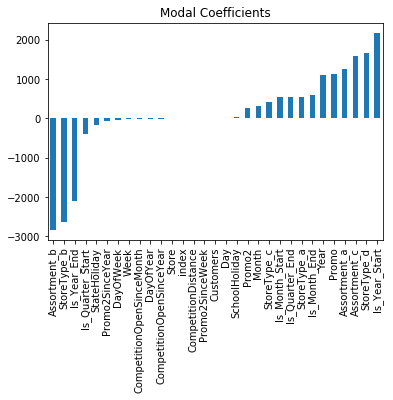

In [50]:
predictors = X_train.columns
coef = pd.Series(model.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=7, selection='cyclic',
   tol=0.0001, warm_start=False)
      cross_validation         rmse           mse          mae        r2  \
name          0.633732  1902.041554  3.617762e+06  1429.248546  0.623652   

      adj_r_squared  
name       0.623606  


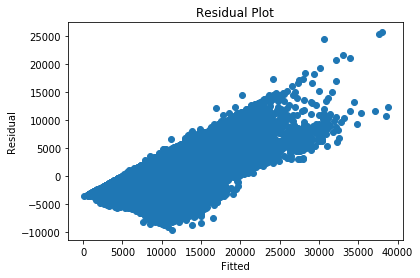

In [51]:
l_model,l_y_pred,l_stats = lasso(X_train,X_test,y_train,y_test,alpha=1)
print(l_model)
print(l_stats)
plot_residuals(y_test,l_y_pred)